<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U40T2C80NeuralNetworkSeriesAssignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
REDES NEURONALES

'''

In [ ]:
'''
EXAMPLES CODE

  # Code to download the dataset
  from keras.datasets import mnist

  (X_train, y_train), (X_test, y_test) = mnist.load_data()

  # check the dataset
  print(X_train.shape) # (60000, 28, 28)
  print(X_test.shape) # (10000, 28, 28)
  print(X_train[0].dtype) # uint8
  print(X_train[0])

  # Smoothing
  X_train = X_train.reshape(-1, 784)
  X_test = X_test.reshape(-1, 784)

  # Visualization of image data
  import matplotlib.pyplot as plt
  %matplotlib inline
  index = 0
  image = X_train[index].reshape(28,28)
  # X_train[index]: (784,)
  # image: (28, 28)
  plt.imshow(image, 'gray')
  plt.title('label : {}'.format(y_train[index]))
  plt.show()

  # topicos avanzados
  index = 0
  image = X_train[index].reshape(28,28)
  image = image.astype(np.float) # float型に変換
  image -= 105.35 # 意図的に負の小数値を作り出してみる
  plt.imshow(image, 'gray')
  plt.title('label : {}'.format(y_train[index]))
  plt.show()
  print(image) # 値を確認

  plt.imshow(image, 'gray', vmin = 0, vmax = 255)

  # Pretreatment
  X_train = X_train.astype(np.float)
  X_test = X_test.astype(np.float)
  X_train /= 255
  X_test /= 255
  print(X_train.max()) # 1.0
  print(X_train.min()) # 0.0

  from sklearn.preprocessing import OneHotEncoder
  enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
  y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
  y_test_one_hot = enc.transform(y_test[:, np.newaxis])
  print(y_train.shape) # (60000,)
  print(y_train_one_hot.shape) # (60000, 10)
  print(y_train_one_hot.dtype) # float64

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
  print(X_train.shape) # (48000, 784)
  print(X_val.shape) # (12000, 784)
'''


In [1]:
# PROTOTYPE NEURAL NETWORK SCRATCH

# PROBLEMAS 1 - 5
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt

class ScratchSimpleNeuralNetrowkClassifier():
    def __init__(self, n_nodes1=400, n_nodes2=200, sigma=0.01, alpha=0.01, epochs=10, batch_size=20, verbose = True):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.sigma = sigma
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        # initializing weights and biases
        self.W1 = None
        self.B1 = None
        self.W2 = None
        self.B2 = None
        self.W3 = None
        self.B3 = None

        # for learning curve
        self.train_loss = []
        self.val_loss = []


    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _tanh(self, x):
        return np.tanh(x)

    def _softmax(self, x):
        # numerically stable softmax
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _cross_entropy_error(self, y, y_pred):
        delta = 1e-7  # to avoid log(0)
        return -np.sum(y * np.log(y_pred + delta)) / y.shape[0]

    def _calc_loss(self, X, y):
        # forward propagation for loss calculation
        A1 = np.dot(X, self.W1) + self.B1
        Z1 = self._tanh(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = self._tanh(A2)
        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = self._softmax(A3)

        return self._cross_entropy_error(y, Z3)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train the Neural Network classifier.

          Parameters

          X : ndarray of shape (n_samples, n_features)
          Features of the training data

          y : ndarray of shape (n_samples,)
          True labels of the training data

          X_val : ndarray of shape (n_samples, n_features)
          Features of the validation data

          y_val : ndarray of shape (n_samples,)
          True labels of the validation data
        """
        n_features = X.shape[1]
        n_output = y.shape[1]

        # PROBLEMA 1 - CREAR UN CODIGO QUE DETERMINE EL VALOR INCIAL DE LOS PESOS
        self.W1 = self.sigma * np.random.randn(n_features, self.n_nodes1)
        self.B1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, n_output)
        self.B3 = np.zeros(n_output)

        # PROBLEMA 2 - IMPLEMENTACION DE LA PROPAGACION HACIA ADELANTE (FORWARD PROPAGATION)
        for epoch in range(self.epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size= self.batch_size)

            for mini_X, mini_y in get_mini_batch:
                # firts layer
                A1 = np.dot(mini_X, self.W1) + self.B1
                Z1 = self._tanh(A1)

                # second layer
                A2 = np.dot(Z1, self.W2) + self.B2
                Z2 = self._tanh(A2)

                # third layer (output)
                A3 = np.dot(Z2, self.W3) + self.B3
                Z3 = self._softmax(A3)

                # PROBLEMA 3 - IMPLEMETACION DEL ERROR DE ENTROPIA CRUZADA (CROSS-ENTROPY)
                loss = self._cross_entropy_error(mini_y, Z3)

                # PROBLEMA 4 - IMPLEMENTACION DE RETROPROPAGACION (BACKPROPAGATION)
                # third layer
                dA3 = (Z3 - mini_y) / self.batch_size
                dB3 = np.sum(dA3, axis=0)
                dW3 = np.dot(Z2.T, dA3)
                dZ2 = np.dot(dA3, self.W3.T)

                # second layer
                dA2 = dZ2 * (1 - np.tanh(A2) ** 2)
                dB2 = np.sum(dA2, axis=0)
                dW2 = np.dot(Z1.T, dA2)
                dZ1 = np.dot(dA2, self.W2.T)

                # firts layer
                dA1 = dZ1 * (1 - np.tanh(A1) ** 2)
                dB1 = np.sum(dA1, axis=0)
                dW1 = np.dot(mini_X.T, dA1)

                # updating weights and biases
                self.W1 -= self.alpha * dW1
                self.B1 -= self.alpha * dB1
                self.W2 -= self.alpha * dW2
                self.B2 -= self.alpha * dB2
                self.W3 -= self.alpha * dW3
                self.B3 -= self.alpha * dB3

            # calculating loss for training and validation data
            train_loss = self._calc_loss(X, y)
            self.train_loss.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self._calc_loss(X_val, y_val)
                self.val_loss.append(val_loss)

            if self.verbose:
                print(f"epoch {epoch+1}/{self.epochs}, train loss: {train_loss:.4f}",
                      f", val loss: {val_loss:.4f}" if X_val is not None and y_val is not None else "")

    # PROBLEMA 5 - ESTIMACION
    def predict(self, X):
        """
        Make predictions using the Neural Network classifier.

          Parameters

          X : ndarray of shape (n_samples, n_features)
          Samples

          Returns

          ndarray of shape (n_samples, 1)
          Predicted results
        """
        # forward propagation
        A1 = np.dot(X, self.W1) + self.B1
        Z1 = self._tanh(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = self._tanh(A2)
        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = self._softmax(A3)

        return np.argmax(Z3, axis=1)

# MINI BATCH PROCESSING
class GetMiniBatch:
    """
    Iterator to obtain mini-batches

      Parameters

      X : ndarray of shape (n_samples, n_features)
      Training data

      y : ndarray of shape (n_samples, 1)
      True labels

      batch_size : int
      Batch size

      seed : int
      Random seed for NumPy
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        #self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# loading MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# preprocessing
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255

# one-hot encode labels
from packaging.version import Version
import sklearn

if Version(sklearn.__version__) >= Version("1.2"):
    enc = OneHotEncoder(sparse_output=False)

else:
    enc = OneHotEncoder(sparse=False)

y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = enc.transform(y_test.reshape(-1, 1))

# splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# converting one-hot back to labels for validation
y_val_labels = np.argmax(y_val, axis=1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# PROBLEMA 6 - 8: VERIFICACION

# PROBLEMA 6 - APRENDIZAJE Y ESTIMACION
model = ScratchSimpleNeuralNetrowkClassifier(n_nodes1=400, n_nodes2=200, sigma=0.01, alpha=0.01, epochs=10, batch_size=20)
model.fit(X_train, y_train, X_val, y_val)

# predicciones
y_pred = model.predict(X_val)
accuracy = np.mean(y_pred == y_val_labels)
print(f"validation accuracy: {accuracy:.4f}")

epoch 1/10, train loss: 0.7054 , val loss: 0.7014
epoch 2/10, train loss: 0.4089 , val loss: 0.4077
epoch 3/10, train loss: 0.3454 , val loss: 0.3465
epoch 4/10, train loss: 0.3136 , val loss: 0.3169
epoch 5/10, train loss: 0.2884 , val loss: 0.2939
epoch 6/10, train loss: 0.2671 , val loss: 0.2746
epoch 7/10, train loss: 0.2486 , val loss: 0.2580
epoch 8/10, train loss: 0.2321 , val loss: 0.2434
epoch 9/10, train loss: 0.2168 , val loss: 0.2298
epoch 10/10, train loss: 0.2022 , val loss: 0.2169
validation accuracy: 0.9377


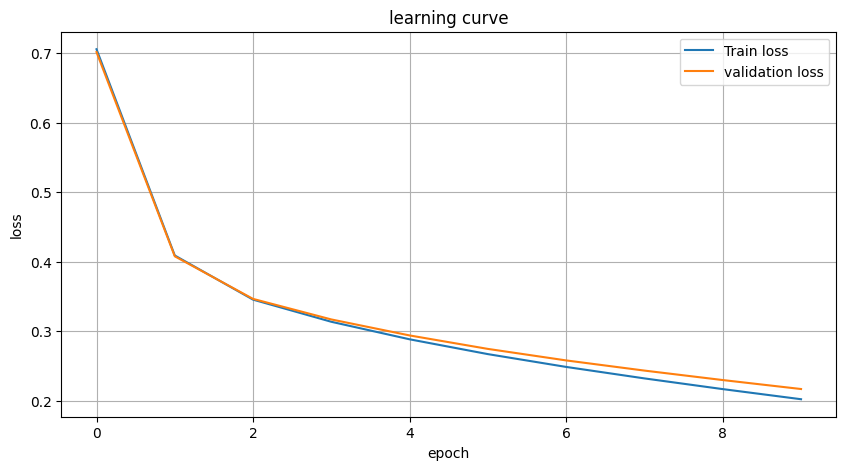

In [3]:
# PROBLEMA 7 - GRAFICO DE LA CURVA DE APRENDIZAJE
plt.figure(figsize=(10,5))
plt.plot(model.train_loss, label='Train loss')
plt.plot(model.val_loss, label= 'validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning curve')
plt.legend()
plt.grid()
plt.show()

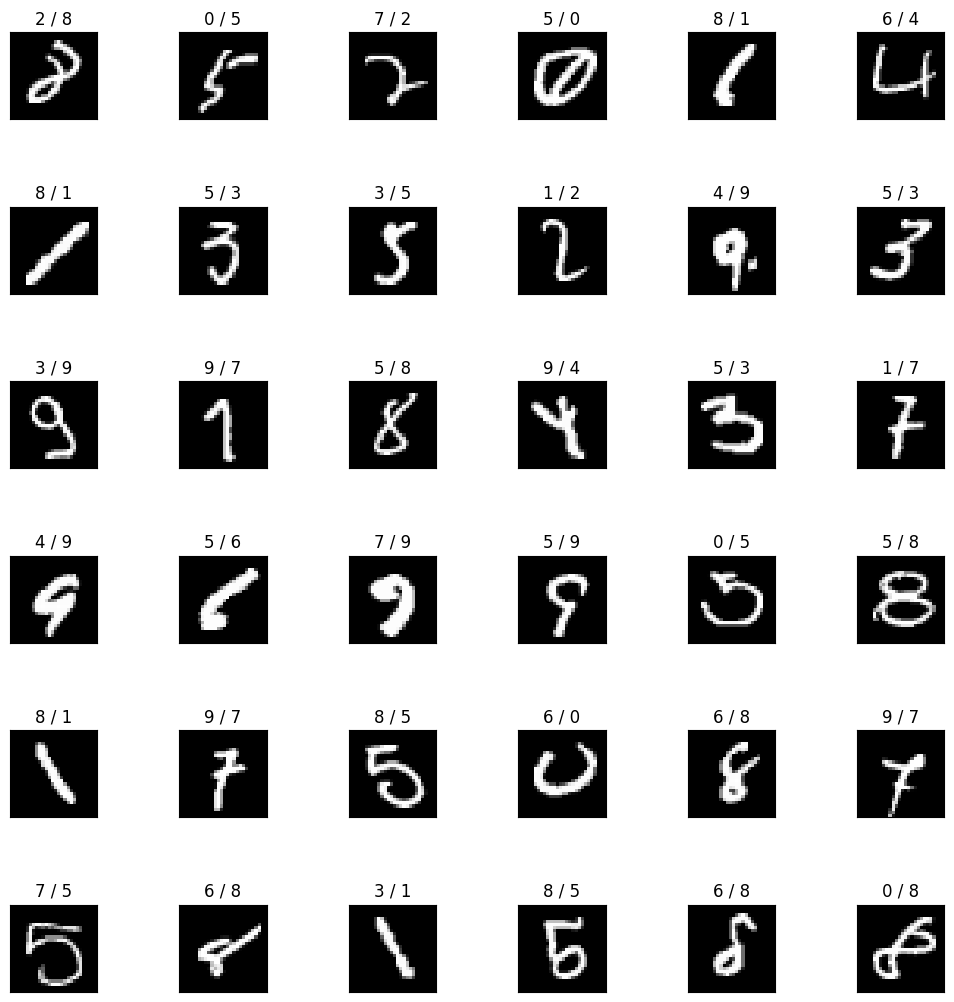

In [12]:
# PROBLEMA 8 - COMPROBAR CLASIFICACIONES ERRONEAS
"""
Display classification results side by side.
The label above the image is shown as "Prediction / Ground Truth".

  Parameters

  y_pred : ndarray of shape (n_samples,)
  Predicted values

  y_val : ndarray of shape (n_samples,)
  Ground-truth labels of the validation data

  X_val : ndarray of shape (n_samples, n_features)
  Features of the validation data
"""
num = 36 # いくつ表示するか

true_false = y_pred == y_val_labels
false_list = np.where(true_false==False)[0].astype(int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val_labels[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

plt.show()